# MILESTONES 1: Analisa Kualitas Udara pada Negara Bagian Amerika Serikat Berdasarkan *Air Quality Index* (AQI)

Nama: Ikhbar Firman Hanafi

Batch: 14

Phase: 0

### Identifikasi Masalah

Kementerian Lingkungan Hidup Amerika Serikat ingin membuat regulasi mengenai emisi industri dan kendaraan bermotor yang kini sangat merusak kualitas udara di negara tersebut. Namun untuk membuat regulasi tersebut, harus diketahui kondisi kualitas udara saat ini di berbagai negara bagian agar mudah menentukan negara bagian mana saja yang harus diterapkan regulasi tersebut terlebih dahulu

Untuk memantau kondisi kualitas udara yang dihirup manusia, Badan Perlindungan Lingkungan Amerika Serikat (EPA) membuat sebuah ukuran yang disebut Indeks Kualitas Udara atau **Air Quality Index (AQI)** yang menggambarkan konsentrasi polusi udara di satu daerah. Bagi masyarakat umum, AQI dapat berperan sebagai tanda peringatan akan polusi udara yang ikut terhirup sehari-hari. Dengan begitu, kita dapat melakukan langkah mitigasi dan pencegahan. Bagaimanapun, polusi udara yang terakumulasi dalam tubuh dapat berbahaya jika di biarkan dalam jangka panjang.

Sesuai dengan Clean Air Act 1990, AQI dari EPA mengukur kualitas udara berdasarkan konsentrasi lima zat polutan, yaitu:

- **Ozone ($O_3$)** di permukaan tanah
- Polusi partikulat (**PM2.5** dan **PM10**)
- Karbon monoksida atau **Carbon monoxide ($CO$)**
- Sulfur dioksida atau **Sulfur dioxide ($SO_2$)**	
- Nitrogen dioksida atau **Nitrogen dioxide ($NO_2$)**

<div>
<center><img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Air_Pollution-Causes%26Effects.svg/1052px-Air_Pollution-Causes%26Effects.svg.png' width="700"/> </center></div>

Berkisar pada skala 0-500, makin tinggi nilai AQI, makin pekat polusi udara dan berbahaya udara yang dihirup. Biasa standarnya adalah 100. Perlu dipertahankan di bawah 100, jika AQI sudah melebihi 100, maka udara tidak layak hirup.
<div>
<center><img src="https://www.epa.gov/sites/default/files/2019-07/aqitableforcourse.png" width="500"/>
</center></div>

Berdasarkan hal tersebut, persepsi udara perkotaan cenderung lebih tercemar daripada udara pedesaan karena ukuran partikel polusi umumnya lebih besar. Tetapi tim University of Illinois melihat toksisitas partikel tersebut, yang secara ilmiah dikenal sebagai **potensi oksidatif**, dan menemukan bahwa ***partikel polusi di daerah pedesaan bisa dua kali lebih beracun meskipun mungkin lebih kecil***. Peningkatan toksisitas partikel terlihat jelas selama musim panas, yang merupakan periode banyak aktivitas pertanian yang intens. Polusi udara pedesaan juga tampak di peternakan sebagian besar berasal dari produksi ternak (yang menghasilkan metana) dan pupuk (yang, ketika rusak, menghasilkan dinitrogen oksida). 

Selain tingkat AQI tiap negara bagian, kementerian Lingkungan Hidup Amerika Serikat juga perlu mempertimbangkan perbedaan kualitas daerah perkotaan dan pedesaan untuk dapat membuat regulasi baru.


Sumber : 
- https://www.idntimes.com/health/fitness/alfonsus-adi-putra-2/memahami-indeks-kualitas-udara-atau-air-quality-index?page=all
- https://www.kcur.org/news/2022-01-31/the-air-in-rural-areas-may-be-just-as-toxic-as-the-pollution-in-cities
- https://www.epa.gov/

### Objective
1. Mengetahui perubahan kadar tiap pollutant di berbagai tahun
2. Mengetahui hubungan parameter cuaca dengan kadar pollutant
3. Mengetahui negara bagian manakah yang cenderung memiliki kadar pollutant yang besar di berbagai tahun
4. Mengetahui kualitas udara tiap berbagai negara bagian dengan kriteria AQI pada tahun 2021
5. Mengetahui keadaan kualitas udara Amerika Serikat secara keseluruhan pada tahun 2021 
5. Mengetahui terdapat pengaruh signifikan antara daerah perkotaan dengan pedesaan.


### Deskripsi Data

#### Sumber data

Data yang digunakan disini didapat dari database '`epa_historical_air_quality`' menggunakan bigquery-public-data pada Google Cloud Big Query dengan kriteria sebagai berikut:
1. Berisi kolom dengan informasi state name, county name, year, pollutants, units of meassure, annual average pollutant concentatrion, annual average first max pollutant concetration value.
2. Parameter Occurrence Code (POC) adalah 1.
3. Dari tahun 2011 hingga 2021.

Berikut ini adalah query yang digunakan untuk mengambil data di Google Cloud Platform:

SELECT  annual.state_name,annual.county_name,annual.year,annual.parameter_name,annual.units_of_measure,AVG(annual.arithmetic_mean) as mean, AVG(annual.first_max_value) as first_max_value

FROM `bigquery-public-data.epa_historical_air_quality.air_quality_annual_summary` annual

WHERE annual.poc = 1 AND (annual.year Between 2011 AND 2021) AND annual.parameter_name in ('Ozone','Carbon monoxide','Nitrogen dioxide (NO2)','PM10 Total 0-10um STP','PM2.5 - Local Conditions','Sulfur dioxide','Dew Point','Relative Humidity ','Barometric pressure','Outdoor Temperature','Wind Direction - Resultant','Wind Speed - Resultant')

GROUP BY annual.year,annual.state_name,annual.county_name,annual.parameter_name,annual.units_of_measure

ORDER BY annual.year,annual.state_name,annual.county_name,annual.parameter_name

#### Info Teknis Data

Data berikut berisikan nilai konsentrasi dari parameter polutan dan informasi cuaca  di tiap daerah USA dari tahun 2011 hingga 2021 yang diukur dalam satu instrumen untuk tiap paramter dengan waktu pengambilan sampel sebagai berikut:

- Ozone : 8-HR RUN AVG BEGIN HOUR
- Nitrogen dioxide (NO2): 1 HOUR
- PM10 Total 0-10um STP: 24-HR BLK AVG
- PM2.5 - Local Conditions: 24-HR BLK AVG
- Barometric pressure: 1 HOUR
- Relative Humidity: 24 HOUR
- Dew Point: 1 HOUR
- Sulfur dioxide: 1 HOUR
- Outdoor Temperature: 1 HOUR
- Wind Speed and Direction - Resultant: 1 HOUR

Detail kolom data:

* **state_name:** Negara bagian di USA
* **county_name:** Daerah di negara bagian yang setingkat dengan kabupaten pada Indonesia
* **Year:** Tahun dilakukan pengukuran parameter pada udara
* **parameter_name:** Parameter udara yang diukur yaitu,
 
    Polutan: 
    - Ozone ($O_3$) di permukaan tanah
    - Polusi partikulat (PM2.5 dan PM10)
    - Carbon monoxide ($CO$)
    - Sulfur dioxide ($SO_2$)
    - Nitrogen dioxide ($NO_2$)
    
    Informasi cuaca: 
    - Dew Point
    - Relative Humidity
    - Barometric pressure
    - Outdoor Temperature
    - Wind Direction - Resultant
    - Wind Speed - Resultant.
* **units_of_measure:** Unit yang digunakan pada pengukuran parameter
* **mean:** Arithmetic mean annual pada masing-masing parameter
* **first_max_value:** Nilai annual pengukuran terbesar pertama pada pengukuran parameter

### Working Area

#### Load Data dan Cleaning Data

Import library yang diperlukan

In [40]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load data menjadi DataFrame

In [41]:
data = pd.read_csv('air_quality_annual_summary.csv')
data.head() #Menampilkan 5 baris pertama dari dataset

,state_name,county_name,year,parameter_name,units_of_measure,mean,first_max_value
0,Alabama,Baldwin,2011,Ozone,Parts per million,0.046721,0.08050
1,Alabama,Baldwin,2011,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),9.953913,21.20000
2,Alabama,Clay,2011,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),10.603390,28.70000
3,Alabama,Colbert,2011,Ozone,Parts per million,0.044951,0.07175
4,Alabama,Colbert,2011,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),10.324348,21.90000


Sebelum kita explore data, terlebih dahulu kita coba cek data type dan ada atau tidaknya missing value di data set.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41545 entries, 0 to 41544
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state_name        41545 non-null  object 
 1   county_name       41545 non-null  object 
 2   year              41545 non-null  int64  
 3   parameter_name    41545 non-null  object 
 4   units_of_measure  41545 non-null  object 
 5   mean              41545 non-null  float64
 6   first_max_value   41545 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.2+ MB


Terdapat 41545 baris data dan tidak terdapat missing value.

Kita coba melihat nilai statistik pada data numerik

In [43]:
data.describe()

,year,mean,first_max_value
count,41545.000000,41545.000000,41545.000000
mean,2015.914454,90.072359,132.118008
std,3.126336,385.295450,476.605446
min,2011.000000,-58.000000,-58.000000
25%,2013.000000,0.373313,3.007000
50%,2016.000000,8.102542,31.225000
75%,2019.000000,55.856687,99.000000
max,2021.000000,34431.717353,35184.700000


Terdapat negative value pada data, dimana data pengukuran masing-masing parameter merupakan non negative. Kita akan coba cek berapa banyak baris data yang negative.

In [44]:
print(f'Terdapat {sum(data["mean"] < 0)} baris dengan negative value')
data[data['mean'] < 0]

Terdapat 23 baris dengan negative value


,state_name,county_name,year,parameter_name,units_of_measure,mean,first_max_value
3857,Alaska,Fairbanks North Star,2012,Outdoor Temperature,Degrees Fahrenheit,-9.001679,36.9000
4025,California,Humboldt,2012,Sulfur dioxide,Parts per billion,-0.116271,0.9875
7199,Utah,Uintah,2012,Sulfur dioxide,Parts per billion,-0.084244,2.4500
11040,Utah,Uintah,2013,Sulfur dioxide,Parts per billion,-0.094849,4.1750
16105,Florida,Miami-Dade,2015,Sulfur dioxide,Parts per billion,-0.024295,0.8500
17641,New Mexico,Grant,2015,Sulfur dioxide,Parts per billion,-0.021938,0.0000
17744,New York,Putnam,2015,Outdoor Temperature,Degrees Fahrenheit,-58.000000,-58.0000
21688,North Carolina,Caldwell,2016,Sulfur dioxide,Parts per billion,-0.332558,1.7750
21697,North Carolina,Cumberland,2016,Sulfur dioxide,Parts per billion,-0.036854,1.3000
22954,Wisconsin,Dane,2016,Sulfur dioxide,Parts per billion,-0.388068,1.0250


Terdapat 23 baris data dengan mean annual negative. Apabila dilihat dari datanya, disini saya asumsikan terdapat error dalam input data atau mungkin error dalam hal lainnya. Kita akan menjadikannya ke positive value, dengan absolute function.

In [45]:
data['mean']= np.abs(data['mean']) # Menerapkan absolute pada kolom annual mean

#### Exploration Data

Pertama kita akan coba tinjau perilaku tiap polutan dari tahun 2011 hingga 2021. Sebelumnyaa kita akan coba kelompokkan parameter menjadi dua list **pollutants** dan **weather_param**.

In [46]:
pollutants = ['Ozone','PM2.5 - Local Conditions','PM10 Total 0-10um STP','Carbon monoxide','Sulfur dioxide','Nitrogen dioxide (NO2)']
weather_param = [param for param in data['parameter_name'].unique() if param not  in pollutants]

Kita akan coba plot annual mean tiap pollutants dari tahun 2011 hingga 2021.

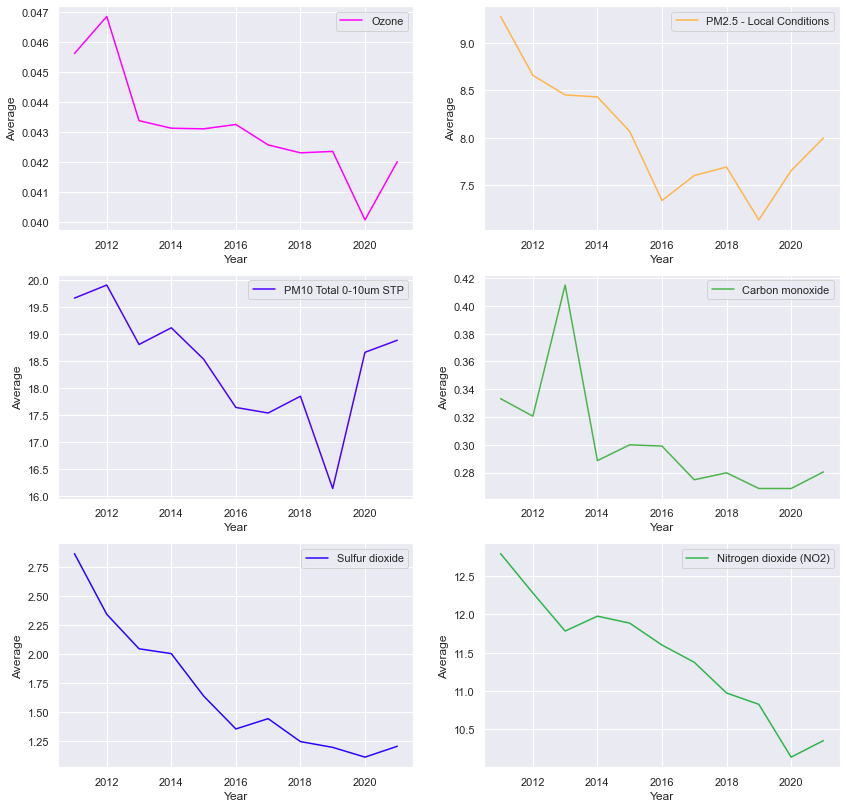

In [47]:
fig, ax = plt.subplots(ncols=2,nrows=3,figsize = (14,14))
pollutants_arr = np.array([pollutants]).reshape(3,2)
for rows in range(3):
    for cols in range(2):
        ax[rows,cols].plot(data[data['parameter_name'] == pollutants_arr[rows,cols]][['year','mean']].groupby('year').mean(),c = ((np.cos(rows))**2,(np.sin(cols))**2,(np.cos(cols))**2))
        ax[rows,cols].set_xlabel('Year')
        ax[rows,cols].set_ylabel('Average')
        ax[rows,cols].legend([pollutants_arr[rows,cols]])
plt.show()

#Bisa juga dilakukan plot masing-masing gambar dengan code berikut:
#for pollutant in pollutants:
    #k = pollutants.index(pollutant)
    #fig, ax = plt.subplots()
    #plt.plot(data[data['parameter_name'] == pollutant][['year','mean']].groupby('year').mean(), c = (0.2*k, (k+1)/15, (k+3)/10))
    #plt.xlabel('Year')
    #plt.ylabel('Average')
    #plt.legend([pollutant])

Dari pemaparan grafik di atas, dapat dilihat kadar tiap polutan mengalami penurunan dalam tiap tahunnya, terutama pada **PM10** yang mengalami penurunan drastis dari tahun 2018 ke tahun 2019 dan **CO** dari tahun 2013 ke tahun 2014, yang sebelumnya mengalami kenaikan yang cukup drastis. Apabila kita perhatikan setelah tahun 2019, trends tiap polutan cenderung mulai agak naik, meskipun kenaikan tidak drastis namuan hal tersebut mulai harus kita waspadai.

Kita belum mengetahui sebab-sebab akan kenaikan dan penurunan drastis pada grafik di atas. Untuk itu kita akan coba tinjau parameter info cuaca dan melihat korelasinya terhadap polutan-polutan tersebut.

Kita akan membuat DataFrame dengan nilai-nilai mean parameter setiap tahunnya.

In [48]:
c = []
for par in data['parameter_name'].unique():
    df = data[(data['parameter_name'] == par)][['mean','year']].groupby('year').mean()
    df.rename(columns={'mean':par},inplace=True)
    c = c + [df]

df_parameter_year = pd.concat(c, axis = 1)
df_parameter_year

,Ozone,PM2.5 - Local Conditions,Barometric pressure,Carbon monoxide,Outdoor Temperature,PM10 Total 0-10um STP,Sulfur dioxide,Wind Direction - Resultant,Wind Speed - Resultant,Relative Humidity,Nitrogen dioxide (NO2),Dew Point
year,,,,,,,,,,,,
2011,0.045628,9.279490,963.326450,0.333205,53.889320,19.668125,2.867432,190.472193,4.764872,65.213235,12.794490,84.402109
2012,0.046868,8.659839,1120.660928,0.320574,55.381850,19.910664,2.345126,189.705543,4.635100,62.190058,12.280494,45.295499
2013,0.043383,8.452621,1027.906053,0.415013,53.007384,18.808527,2.047895,191.594171,4.534159,64.836007,11.783442,42.738467
2014,0.043132,8.431559,963.178404,0.288582,53.358475,19.118004,2.006138,191.002459,4.554374,63.643223,11.977542,43.359748
2015,0.043110,8.069144,962.043279,0.299956,54.784104,18.536780,1.641713,187.002804,4.308228,64.505788,11.886704,45.854660
2016,0.043256,7.340486,961.786248,0.299048,55.530327,17.641361,1.357345,187.790522,4.378912,64.019601,11.600476,47.328740
2017,0.042574,7.604319,1072.829791,0.274792,55.329127,17.538185,1.445994,188.559146,4.533182,62.686421,11.375494,45.187369
2018,0.042309,7.693286,1115.834688,0.279799,54.267377,17.849432,1.248452,187.097719,5.504139,63.678396,10.974026,44.268435
2019,0.042357,7.136424,963.195489,0.268520,53.818325,16.138347,1.198712,186.927873,4.495150,64.950127,10.826043,45.810622


<AxesSubplot:>

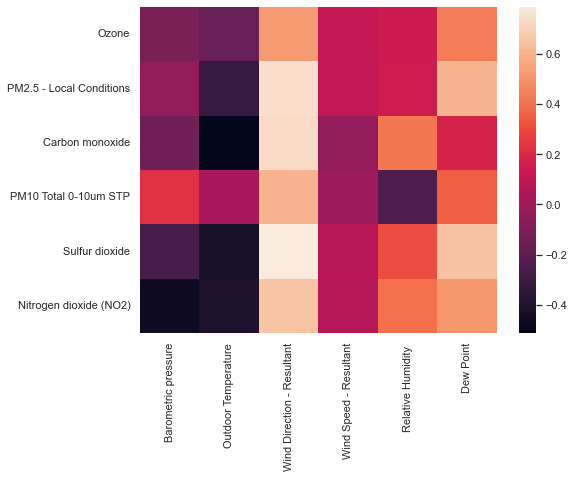

In [49]:
cor = df_parameter_year.corr().iloc[[0,1,3,5,6,10],[2,4,7,8,9,11]] #Membuat array 2D dengan elemen korelasi pada masing-masing parameter
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(cor) #Plot nilai korelasi tersebut

Dari gambar di atas, kita dapat melihat beberapa weather parameter memiliki korelasi positif dan negatif terhadap jenis polutan. 
- **Carbon monoxide** dan **Outdoor Temperature** memiliki korelasi negatif, sedangkan **Carbon monoxide** dan **Wind direction** memiliki korelasi positif.
- **PM2.5** dan **Wind direction** serta **PM2.5** dan **Dew Point** memiliki korelasi positif.
- **Sulfur dioxide** dan **Wind direction** memiliki korelasi positif, sedangkan **Sulfur dioxide** dan **Outdoor Temperature** memiliki korelasi negatif.
- **Nitrogen dioxide** dan **Barometric pressure** memiliki korelasi negatif, sedangkan **Nitrogen dioxide** dan **Wind direction** memiliki korelasi positif.

Untuk lebih jelasnya kita akan coba plot beberapa variabel polutan dan weather parameter yang memiliki korelasi yang cukup tinggi.

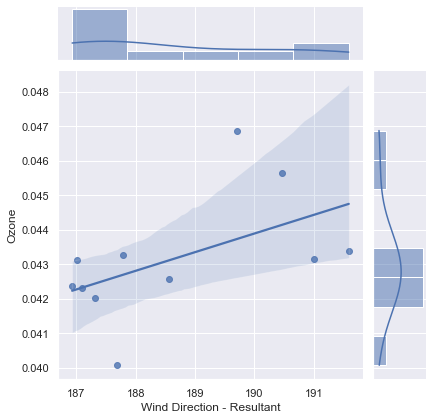

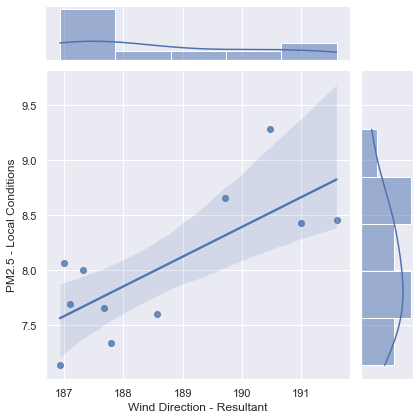

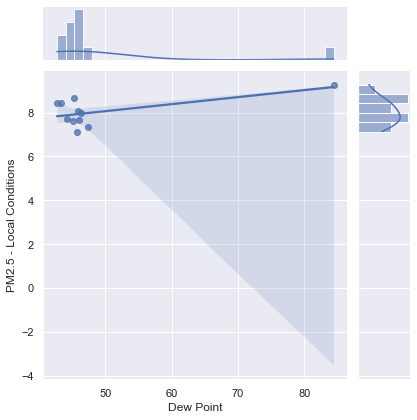

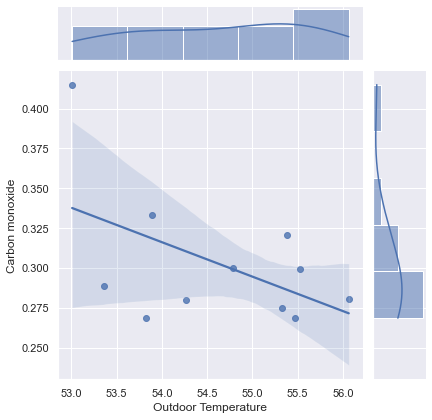

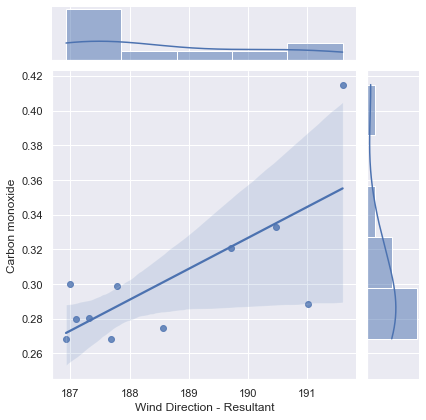

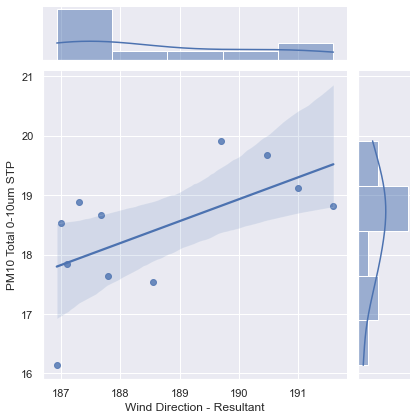

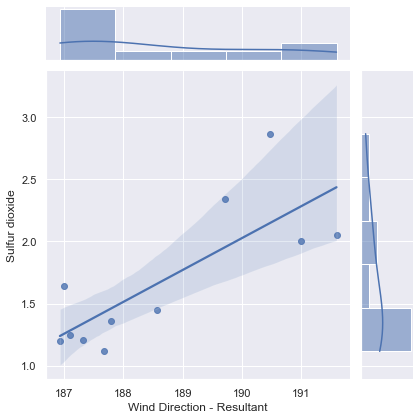

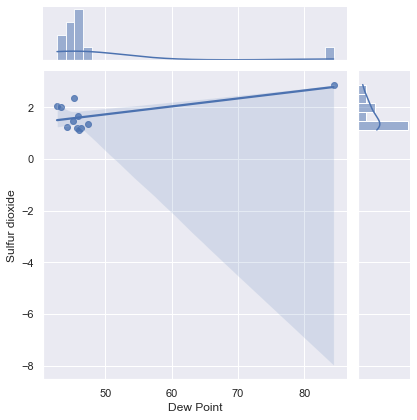

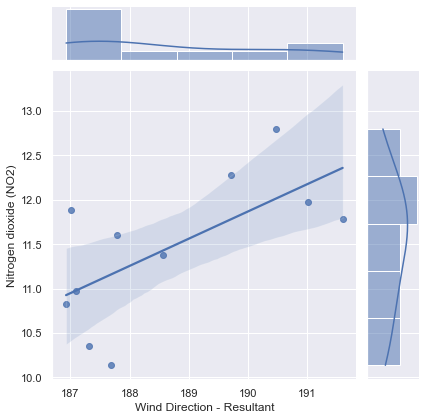

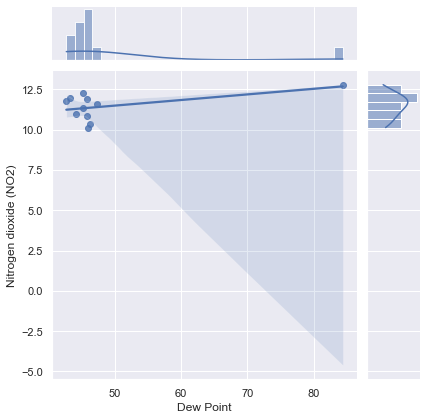

In [50]:
for i in range(cor.shape[0]):
    for j in range(cor.shape[1]):
        if np.abs(cor.iloc[i,j]) > 0.5:
            sns.jointplot(data=df_parameter_year, x=cor.columns[j], y=cor.index[i], kind="reg")

Sebelumnya kita telah ketahui bahwa annual mean **Carbon monoxide** mengalami kenaikan yang signifikan thaun 2012 ke tahun 2013, dan mengalami penurunan yang signifikan setelahnya dari tahun 2013 ke tahun 2014. Dan kita telah mendapatkan korelasi yang cukup kuat antara **Carbon monoxide** dan **Outdoor Temperature** (korelasi negatif), serta **Carbon monoxide** dan **wind Direction** (korelasi positif). Kita coba amati berdasarkan data dari tahun 2012-2014 sebagai berikut.

In [51]:
df_parameter_year.iloc[1:4,[3,4,7]] #Menampilkan data tahun 2012-2013 pada kolom CO, temperature, dan wind direction.

,Carbon monoxide,Outdoor Temperature,Wind Direction - Resultant
year,,,
2012,0.320574,55.381850,189.705543
2013,0.415013,53.007384,191.594171
2014,0.288582,53.358475,191.002459


Pada tahun 2012 ke 2013, Outdoor Temperature meningkat, Wind Direction mengalami penurunan, dan Carbon monoxide mengalami peningkatan. Pada tahun 2013 ke 2014 terjadi sebaliknya Outdoor Temperature turun, Wind Direction mengalami kenaikan, dan Carbon monoxide mengalami penurunan. Nilai korelasi tiap parameter tersebut dapat membantu kita meninjau perilaku polutan dan info cuaca.

Berikutnya kita akan coba menelusuri negara bagian manakah yang memiliki nilai minimum dan maksimum pada annual mean masing-masing polutan dalam 5 tahun terakhir.

In [52]:
state_list = data['state_name'].unique().tolist() #Membuat list negara bagian

Kita akan coba menampilkan nilai minimum dan maksimum polutan beserta nama negara bagiannya ke suatu DataFrame.

In [53]:
stack_row = []
for year in range(2017,2022):
    df_poll_maxmin = pd.DataFrame([],index = [4*[year],['state_name_max','max_value','state_name_min','min_value']])
    for pollutant in pollutants:
        data_year = data[(data['parameter_name'] == pollutant) & (data['year'] == year)]
        maks_poll = data_year.iloc[np.argmax(data_year['mean'])][['state_name','mean']].tolist()
        min_poll = data_year.iloc[np.argmin(data_year['mean'])][['state_name','mean']].tolist()
        df_poll_maxmin[pollutant] = maks_poll +min_poll
    stack_row = stack_row + [df_poll_maxmin]
df_poll = pd.concat(stack_row, axis=0).transpose()
df_poll

2017                            \
                             state_name_max  max_value state_name_min   
Ozone                            California   0.057159    Puerto Rico   
PM2.5 - Local Conditions         California  17.068644         Hawaii   
PM10 Total 0-10um STP     Country Of Mexico   73.89641       Colorado   
Carbon monoxide                      Alaska   0.682284        Wyoming   
Sulfur dioxide                     Virginia  24.351901     California   
Nitrogen dioxide (NO2)             Colorado  30.940777        Wyoming   

                                                 2018             \
                         min_value     state_name_max  max_value   
Ozone                     0.006836           Colorado   0.059149   
PM2.5 - Local Conditions  2.575845             Oregon  18.767521   
PM10 Total 0-10um STP     6.178967  Country Of Mexico  66.964033   
Carbon monoxide           0.015854               Utah   1.055346   
Sulfur dioxide            0.002308             Hawaii   20.00844   
Nitrogen dioxide (NO2)    0.658724           Colorado   30.54757   

                                                                2019  \
                         state_name_min min_value     state_name_max   
Ozone                       Puerto Rico  0.006505         California   
PM2.5 - Local Conditions       Colorado  1.695251         California   
PM10 Total 0-10um STP          Colorado  4.145505  Country Of Mexico   
Carbon monoxide            Pennsylvania  0.021126               Utah   
Sulfur dioxide               California  0.019717           Missouri   
Nitrogen dioxide (NO2)          Wyoming   0.68874           Colorado   

                                                                       2020  \
                          max_value state_name_min min_value state_name_max   
Ozone                      0.055547    Puerto Rico  0.006951     California   
PM2.5 - Local Conditions  12.897345           Utah  0.605414     California   
PM10 Total 0-10um STP     56.384862           Utah  4.750868     California   
Carbon monoxide            1.292191       Illinois  0.020882    Puerto Rico   
Sulfur dioxide            28.984011       Oklahoma  0.007923       Missouri   
Nitrogen dioxide (NO2)    30.211025        Wyoming  0.870426       Colorado   

                                                                        2021  \
                          max_value  state_name_min min_value state_name_max   
Ozone                      0.057099     Puerto Rico  0.012946        Wyoming   
PM2.5 - Local Conditions   20.57794         Montana  2.348986     California   
PM10 Total 0-10um STP     55.070175        Virginia      6.04     California   
Carbon monoxide            0.827655  South Carolina  0.017849    Puerto Rico   
Sulfur dioxide            23.246112  North Carolina  0.001917       Missouri   
Nitrogen dioxide (NO2)    27.571521         Wyoming  1.088223       Colorado   

                                                              
                          max_value state_name_min min_value  
Ozone                       0.05851    Puerto Rico  0.012209  
PM2.5 - Local Conditions   18.86087        Arizona     1.896  
PM10 Total 0-10um STP      53.09434       Virginia  5.666667  
Carbon monoxide            1.947023        Florida  0.056175  
Sulfur dioxide            27.910553     New Jersey  0.011089  
Nitrogen dioxide (NO2)    28.083703        Wyoming   1.14209

Dari tabel di atas, tampak jelas bahwa dalam 5 tahun terakhir:
1. **Wyoming** selalu memiliki kadar **NO2** terkecil 
2. **Puerto Rico** selalu memiliki kadar **Ozone** terkecil
3. **California** cukup sering memiliki kadar **PM2.5** terbesar
4. **Colorado** selalu memiliki kadar **NO2** terbesar
5. **Missouri** menempati kadar **SO2** tertinggi dalam 3 tahun terakhir
6. **Country Of Mexico** cukup sering memiliki kadar **PM10** terbesar.

#### AQI Calculation

Kita akan coba menilai kualitas udara tiap negara bagian US berdasarkan kada konsentrasi masing-masing polutan tahun 2021. Penilaian kualitas udara biasanya dilakukan dengan berdasarkan **Air quality index (AQI)** berdasarkan ketentuan U.S. Environmental Protection Agency (EPA). https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf
<div>
<center><img src="https://www.epa.gov.tw/File/C8314F72F3092ECE?s=l" width="700"/>
</center></div>

Perhitungan AQI tiap polutan dapat diketahui dengan:

$\begin{equation}I_p=\frac {I_{HI}-I_{LO}}{BP_{HI}-BP_{LO}}(C_p-BP_{LO})+I_{LO}\end{equation}$

- Ip = the index for pollutant p
- Cp = the truncated concentration of pollutant p
- BPHi = the concentration breakpoint that is greater than or equal to Cp
- BPLo = the concentration breakpoint that is less than or equal to Cp
- IHi = the AQI value corresponding to BPHi
- ILo = the AQI value corresponding to BPLo


Untuk melakukan perhitungan AQI terhadap masing-masing polutan, langkah pertama kita akan modify DataFrame dengan mengkategorikan berdasarkan negara bagian dan parameter polutan tahun 2021 sebagai berikut.

In [54]:
filter_poll = []
for i in range(len(data)):
    if data['parameter_name'].iloc[i] in pollutants:
        filter_poll.append(True)
    else: filter_poll.append(False)
data_pollutant = data[filter_poll]
data_pollutant_2021 = data_pollutant[data_pollutant['year'] == 2021].groupby(['state_name','parameter_name']).mean()
data_pollutant_2021.tail(12)

year       mean  first_max_value
state_name parameter_name                                              
Wisconsin  Carbon monoxide           2021.0   0.185769         0.785167
           Nitrogen dioxide (NO2)    2021.0   9.672639        35.383333
           Ozone                     2021.0   0.043479         0.072962
           PM10 Total 0-10um STP     2021.0  12.257359        37.500000
           PM2.5 - Local Conditions  2021.0   7.630502        30.880952
           Sulfur dioxide            2021.0   0.809157        17.732143
Wyoming    Carbon monoxide           2021.0   0.106503         0.484333
           Nitrogen dioxide (NO2)    2021.0   5.638736        30.163485
           Ozone                     2021.0   0.049646         0.076455
           PM10 Total 0-10um STP     2021.0  14.421532       147.776812
           PM2.5 - Local Conditions  2021.0   5.136738        29.966387
           Sulfur dioxide            2021.0   0.721432        19.232292

##### Ozone $(O_3)$ AQI

Kita akan membuat DataFrame tersendiri untuk polutan **Ozone** pada tiap negara bagian.

In [55]:
state_o3_list = []
aqi_o3_list = []
status_o3_list = []
for i,j in (data_pollutant_2021.index):
    if j == 'Ozone':
        o3 = data_pollutant_2021.loc[i,j]['mean']
        if o3 <= 0.054:
            aqi_o3 = ((50-0)/(0.054-0))*(o3-0) + 0
            state_o3_list.append(i)
            aqi_o3_list.append(aqi_o3)
            status_o3_list.append('Good')
        elif o3 <= 0.070:
            aqi_o3 = ((100-51)/(0.070-0.055))*(o3-0.055) + 51
            state_o3_list.append(i)
            aqi_o3_list.append(aqi_o3)
            status_o3_list.append('Moderate')
        elif o3 <= 0.085:
            aqi_o3 = ((150-101)/(0.085-0.071))*(o3-0.071) + 101
            state_o3_list.append(i)
            aqi_o3_list.append(aqi_o3)
            status_o3_list.append('Unhealthy for sensitive groups')
        elif o3 <= 0.105:
            aqi_o3 = ((200-151)/(0.105-0.086))*(o3-0.086) + 151
            state_o3_list.append(i)
            aqi_o3_list.append(aqi_o3)
            status_o3_list.append('Unhealthy')
        elif o3 <= 0.200:
            aqi_o3 = ((300-201)/(0.200-0.106))*(o3-0.106) + 201
            state_o3_list.append(i)
            aqi_o3_list.append(aqi_o3)
            status_o3_list.append('Very unhealthy')
        else: print('Apabila O3 lebih besar dari 0.2 harus diperhitungakm dengan pengukuran 1-hour O3 concentrations')

df_aqi_o3 = pd.DataFrame({'state_name':state_o3_list, 'O3_AQI':aqi_o3_list, 'status':status_o3_list})
df_aqi_o3.sort_values('O3_AQI')

,state_name,O3_AQI,status
40,Puerto Rico,16.695216,Good
12,Hawaii,24.354630,Good
1,Alaska,25.931134,Good
10,Florida,33.855907,Good
19,Louisiana,33.861919,Good
20,Maine,34.026943,Good
46,Vermont,34.728164,Good
0,Alabama,35.396902,Good
30,New Hampshire,35.964892,Good
25,Mississippi,36.267888,Good


Tabel di atas dapat divisualisasikan dengan diagram batang sebagai berikut.

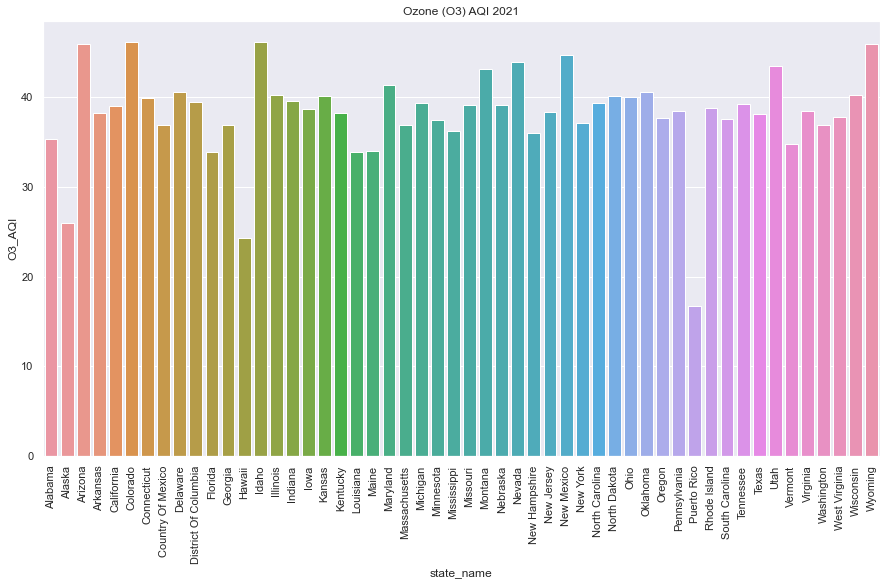

In [56]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='state_name',y='O3_AQI',data=df_aqi_o3)
plt.xticks(rotation=90)
plt.title('Ozone (O3) AQI 2021')
plt.show()

Dari penjabaran di atas dapat kita lihat **Puerto Rico** memiliki nilai AQI **Ozone** terkecil di tahun 2021, sedangkan **Colorado** memiliki nilai AQI **Ozone** terbesar di tahun 2021. Semua nilai AQI pada negara bagian tersebut tergolong kategori *GOOD*.

Nampaknya ada beberapa negara bagian yang tidak termasuk ke perhitungan AQI ozone tersebut. Kita coba cek jumlah negara bagian di perhitungan kita dengan negara bagian pada data awal.

In [57]:
print(data_pollutant['state_name'].nunique())
print(len(state_o3_list))

54
52


In [58]:
for state in [i for i in data_pollutant['state_name'].unique() if i not in state_o3_list]:
    print(state)

South Dakota
Virgin Islands


Terdapat dua negara bagian yaitu South Dakota dan Virgin Islands yang tidak ada dalam list perhitungan AQI **Ozone**, mari kita coba perhatikan pada data set untuk kedua negara bagian tersebut.

In [59]:
data_pollutant[((data_pollutant['state_name'] == 'South Dakota') | (data_pollutant['state_name'] == 'Virgin Islands')) & (data_pollutant['year'] == 2021)]

,state_name,county_name,year,parameter_name,units_of_measure,mean,first_max_value
40739,South Dakota,Minnehaha,2021,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),8.029608,66.1


South Dakota hanya memiliki parameter PM2.5 sedangkan Virgin Islands tidak ada di data tahun 2021. Hal tersebut bisa saja terjadi dalam parameter polutan lain, dikarenakan tidak semua negara bagian mempunyai site untuk semua parameter polutan atau bisa terdapat faktor-faktor lain yang menyebabkan tidak tercatat dalam data.

##### Carbon Monoxide $(CO)$ AQI

Kita akan membuat DataFrame tersendiri untuk polutan **Carbon monoxide** pada tiap negara bagian.

In [60]:
state_co_list = []
aqi_co_list = []
status_co_list = []
for i,j in (data_pollutant_2021.index):
    if j == 'Carbon monoxide':
        co = data_pollutant_2021.loc[i,j]['mean']
        if co <= 4.4:
            aqi_co = ((50-0)/(4.4-0))*(co-0) + 0
            state_co_list.append(i)
            aqi_co_list.append(aqi_co)
            status_co_list.append('Good')
        elif co <= 9.4:
            aqi_co = ((100-51)/(9.4-4.5))*(co-4.5) + 51
            state_co_list.append(i)
            aqi_co_list.append(aqi_co)
            status_co_list.append('Moderate')
        elif co <= 12.4:
            aqi_co = ((150-101)/(12.4-9.5))*(co-9.5) + 101
            state_co_list.append(i)
            aqi_co_list.append(aqi_co)
            status_co_list.append('Unhealthy for sensitive groups')
        elif co <= 15.4:
            aqi_co = ((200-151)/(15.4-12.5))*(co-12.5) + 151
            state_co_list.append(i)
            aqi_co_list.append(aqi_co)
            status_co_list.append('Unhealthy')
        elif co <= 30.4:
            aqi_co = ((300-201)/(30.4-15.5))*(co-0.106) + 201
            state_co_list.append(i)
            aqi_co_list.append(aqi_co)
            status_co_list.append('Very unhealthy')
        elif co <= 40.4:
            aqi_co = ((400-301)/(40.4-30.5))*(co-0.106) + 301
            state_co_list.append(i)
            aqi_co_list.append(aqi_co)
            status_co_list.append('Hazardous I')
        else:
            aqi_co = ((500-401)/(50.4-40.5))*(co-0.106) + 401
            state_co_list.append(i)
            aqi_co_list.append(aqi_co)
            status_co_list.append('Hazardous II')

df_aqi_co = pd.DataFrame({'state_name':state_co_list, 'CO_AQI':aqi_co_list, 'status':status_co_list})
df_aqi_co.sort_values('CO_AQI')

,state_name,CO_AQI,status
49,Wyoming,1.210265,Good
25,Montana,1.640290,Good
40,South Carolina,1.775915,Good
23,Mississippi,1.843358,Good
28,New Hampshire,1.887852,Good
18,Maine,1.897051,Good
30,New Mexico,1.935932,Good
15,Kansas,2.035642,Good
33,North Dakota,2.052989,Good
43,Utah,2.080332,Good


Tabel di atas dapat ditampilkan dengan diagram batang berikut.

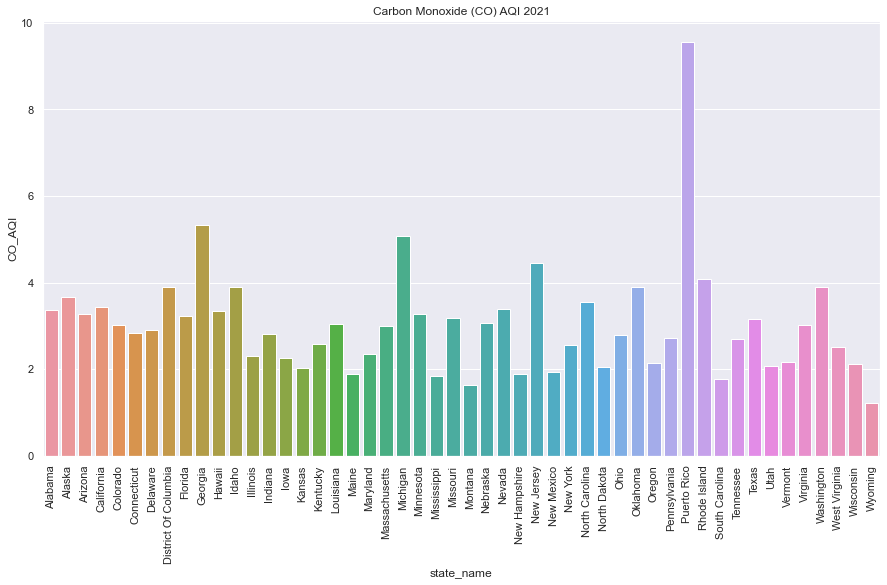

In [61]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='state_name',y='CO_AQI',data=df_aqi_co)
plt.xticks(rotation=90)
plt.title('Carbon Monoxide (CO) AQI 2021')
plt.show()

Dari penjabaran di atas, semua negara bagian memiliki nilai AQI dengan kategori *GOOD*. **Wyoming** memiliki AQI **CO** terkecil, sedangkan **Puerto Rico** memiliki nilai AQI **CO** terbesar di tahun 2021.

##### Sulfur dioxide $(SO_2)$ AQI

Kita akan membuat DataFrame tersendiri untuk polutan **Sulfur dioxide** pada tiap negara bagian.

In [62]:
state_so2_list = []
aqi_so2_list = []
status_so2_list = []
for i,j in (data_pollutant_2021.index):
    if j == 'Sulfur dioxide':
        so2 = data_pollutant_2021.loc[i,j]['mean']
        if so2 <= 35:
            aqi_so2 = ((50-0)/(35-0))*(so2-0) + 0
            state_so2_list.append(i)
            aqi_so2_list.append(aqi_so2)
            status_so2_list.append('Good')
        elif so2 <= 75:
            aqi_so2 = ((100-51)/(75-36))*(so2-36) + 51
            state_so2_list.append(i)
            aqi_so2_list.append(aqi_so2)
            status_so2_list.append('Moderate')
        elif so2 <= 185:
            aqi_so2 = ((150-101)/(185-76))*(so2-9.5) + 101
            state_so2_list.append(i)
            aqi_so2_list.append(aqi_so2)
            status_so2_list.append('Unhealthy for sensitive groups')
        elif so2 <= 304:
            aqi_so2 = ((200-151)/(304-186))*(so2-12.5) + 151
            state_so2_list.append(i)
            aqi_so2_list.append(aqi_so2)
            status_so2_list.append('Unhealthy')
        elif so2 <= 604:
            aqi_so2 = ((300-201)/(604-305))*(so2-0.106) + 201
            state_so2_list.append(i)
            aqi_so2_list.append(aqi_so2)
            status_so2_list.append('Very unhealthy')
        elif so2 <= 804:
            aqi_so2 = ((400-301)/(804-605))*(so2-0.106) + 301
            state_so2_list.append(i)
            aqi_so2_list.append(aqi_so2)
            status_so2_list.append('Hazardous I')
        else:
            aqi_so2 = ((500-401)/(1004-805))*(so2-0.106) + 401
            state_so2_list.append(i)
            aqi_so2_list.append(aqi_so2)
            status_so2_list.append('Hazardous II')

df_aqi_so2 = pd.DataFrame({'state_name':state_so2_list, 'SO2_AQI':aqi_so2_list, 'status':status_so2_list})
df_aqi_so2.sort_values('SO2_AQI')

,state_name,SO2_AQI,status
17,Maine,0.225862,Good
38,Rhode Island,0.280203,Good
39,South Carolina,0.316518,Good
5,Connecticut,0.324793,Good
6,Delaware,0.363607,Good
19,Massachusetts,0.440692,Good
45,Washington,0.444202,Good
28,New Jersey,0.560834,Good
18,Maryland,0.565679,Good
43,Vermont,0.571564,Good


Hasil penjabaran nilai AQI tersebut dapat ditampilkan dengan diagram batang sebagai berikut.

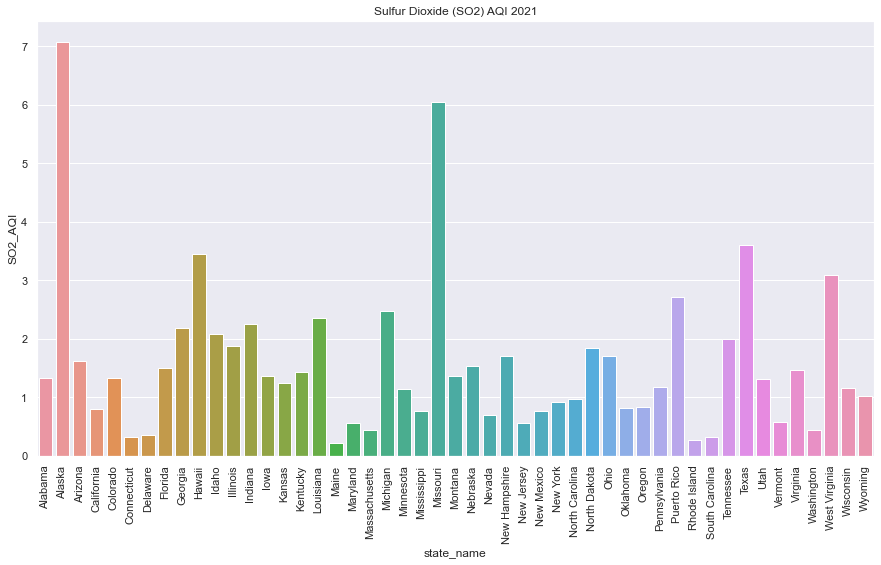

In [63]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='state_name',y='SO2_AQI',data=df_aqi_so2)
plt.xticks(rotation=90)
plt.title('Sulfur Dioxide (SO2) AQI 2021')
plt.show()

Semua negara bagian tersebut memiliki nilai AQI yang tergolong *GOOD*. **Alaska** memiliki nilai AQI **$SO_2$** terbesar dan jauh dibandingkan kebanyakan negara bagian lainnya, sedangkan **Maine** memiliki nilai AQI **$SO_2$** pada tahun 2021.

##### Nitrogen dioxide $(NO_2)$ AQI

Kita akan membuat DataFrame tersendiri untuk polutan **Nitrogen dioxide** pada tiap negara bagian.

In [64]:
state_no2_list = []
aqi_no2_list = []
status_no2_list = []
for i,j in (data_pollutant_2021.index):
    if j == 'Nitrogen dioxide (NO2)':
        no2 = data_pollutant_2021.loc[i,j]['mean']
        if no2 <= 53:
            aqi_no2 = ((50-0)/(53-0))*(no2-0) + 0
            state_no2_list.append(i)
            aqi_no2_list.append(aqi_no2)
            status_no2_list.append('Good')
        elif no2 <= 100:
            aqi_no2 = ((100-51)/(100-54))*(no2-36) + 51
            state_no2_list.append(i)
            aqi_no2_list.append(aqi_no2)
            status_no2_list.append('Moderate')
        elif no2 <= 360:
            aqi_no2 = ((150-101)/(360-101))*(no2-9.5) + 101
            state_no2_list.append(i)
            aqi_no2_list.append(aqi_no2)
            status_no2_list.append('Unhealthy for sensitive groups')
        elif no2 <= 649:
            aqi_no2 = ((200-151)/(649-361))*(no2-12.5) + 151
            state_no2_list.append(i)
            aqi_no2_list.append(aqi_no2)
            status_no2_list.append('Unhealthy')
        elif no2 <= 1249:
            aqi_no2 = ((300-201)/(1249-650))*(no2-0.106) + 201
            state_no2_list.append(i)
            aqi_no2_list.append(aqi_no2)
            status_no2_list.append('Very unhealthy')
        elif no2 <= 1649:
            aqi_no2 = ((400-301)/(1649-1250))*(no2-0.106) + 301
            state_no2_list.append(i)
            aqi_no2_list.append(aqi_no2)
            status_no2_list.append('Hazardous I')
        else:
            aqi_no2 = ((500-401)/(2049-1650))*(no2-0.106) + 401
            state_no2_list.append(i)
            aqi_no2_list.append(aqi_no2)
            status_no2_list.append('Hazardous II')

df_aqi_no2 = pd.DataFrame({'state_name':state_no2_list, 'NO2_AQI':aqi_no2_list, 'status':status_no2_list})
df_aqi_no2.sort_values('NO2_AQI')

,state_name,NO2_AQI,status
24,Montana,1.671158,Good
30,North Dakota,4.118380,Good
10,Hawaii,4.408944,Good
45,Wyoming,5.319562,Good
13,Iowa,5.367231,Good
14,Kansas,6.048992,Good
22,Mississippi,6.073305,Good
17,Maine,6.876481,Good
35,Puerto Rico,7.380807,Good
39,Texas,7.699735,Good


Hasil nilai AQI NO2 pada tiap negara bagian tersebut dapat ditampilkan dengan diagram batang berikut.

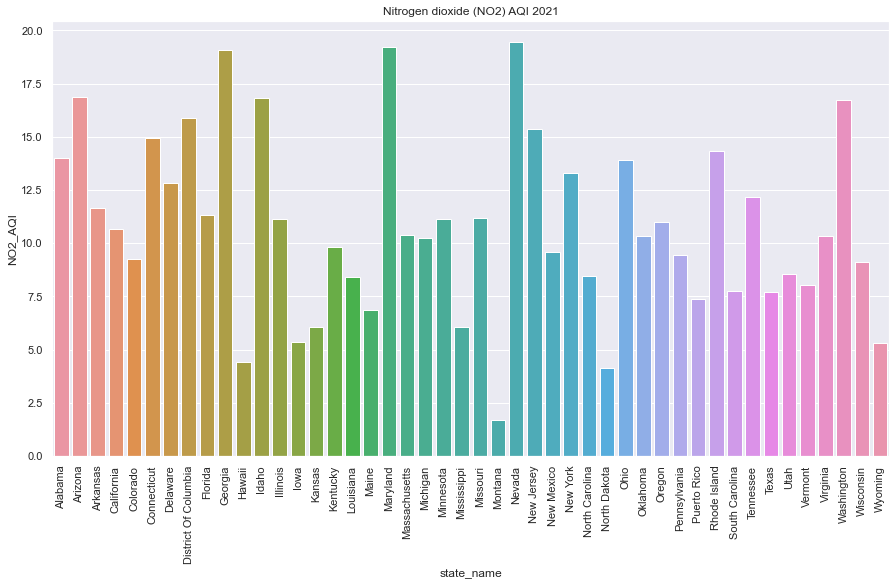

In [65]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='state_name',y='NO2_AQI',data=df_aqi_no2)
plt.xticks(rotation=90)
plt.title('Nitrogen dioxide (NO2) AQI 2021')
plt.show()

Semua negara bagian tersebut memiliki nilai AQI **NO2** yang tergolong *GOOD*. **Montana** memiliki nilai AQI NO2 yang terkecil, sedangkan Nevada memiliki nilai AQI NO2 terbesar pada tahun 2021.

##### PM2.5 AQI

Kita akan membuat DataFrame tersendiri untuk polutan **PM2.5** pada tiap negara bagian.

In [66]:
state_pm25_list = []
aqi_pm25_list = []
status_pm25_list = []
for i,j in (data_pollutant_2021.index):
    if j == 'PM2.5 - Local Conditions':
        pm25 = data_pollutant_2021.loc[i,j]['mean']
        if pm25 <= 15.4:
            aqi_pm25 = ((50-0)/(15.4-0))*(pm25-0) + 0
            state_pm25_list.append(i)
            aqi_pm25_list.append(aqi_pm25)
            status_pm25_list.append('Good')
        elif pm25 <= 35.4:
            aqi_pm25 = ((100-51)/(35.4-15.4))*(pm25-36) + 51
            state_pm25_list.append(i)
            aqi_pm25_list.append(aqi_pm25)
            status_pm25_list.append('Moderate')
        elif pm25 <= 54.4:
            aqi_pm25 = ((150-101)/(54.4-35.5))*(pm25-9.5) + 101
            state_pm25_list.append(i)
            aqi_pm25_list.append(aqi_pm25)
            status_pm25_list.append('Unhealthy for sensitive groups')
        elif pm25 <= 150.4:
            aqi_pm25 = ((200-151)/(150.4-54.5))*(pm25-12.5) + 151
            state_pm25_list.append(i)
            aqi_pm25_list.append(aqi_pm25)
            status_pm25_list.append('Unhealthy')
        elif pm25 <= 250.4:
            aqi_pm25 = ((300-201)/(250.4-150.5))*(pm25-0.106) + 201
            state_pm25_list.append(i)
            aqi_pm25_list.append(aqi_pm25)
            status_pm25_list.append('Very unhealthy')
        elif pm25 <= 350.4:
            aqi_pm25 = ((400-301)/(350.4-250.5))*(pm25-0.106) + 301
            state_pm25_list.append(i)
            aqi_pm25_list.append(aqi_pm25)
            status_pm25_list.append('Hazardous I')
        else:
            aqi_pm25 = ((500-401)/(500.4-350.5))*(pm25-0.106) + 401
            state_pm25_list.append(i)
            aqi_pm25_list.append(aqi_pm25)
            status_pm25_list.append('Hazardous II')

df_aqi_pm25 = pd.DataFrame({'state_name':state_pm25_list, 'PM25_AQI':aqi_pm25_list, 'status':status_pm25_list})
df_aqi_pm25.sort_values('PM25_AQI')

,state_name,PM25_AQI,status
11,Hawaii,10.394590,Good
51,Wyoming,16.677721,Good
29,New Hampshire,16.917856,Good
46,Vermont,17.006144,Good
26,Montana,17.746017,Good
19,Maine,20.428169,Good
7,Delaware,20.497098,Good
6,Connecticut,20.607585,Good
1,Alaska,21.069372,Good
32,New York,21.485617,Good


Nilai AQI PM2.5 pada semua negara bagian tersebut dapat ditampilkan dengan diagram batang berikut.

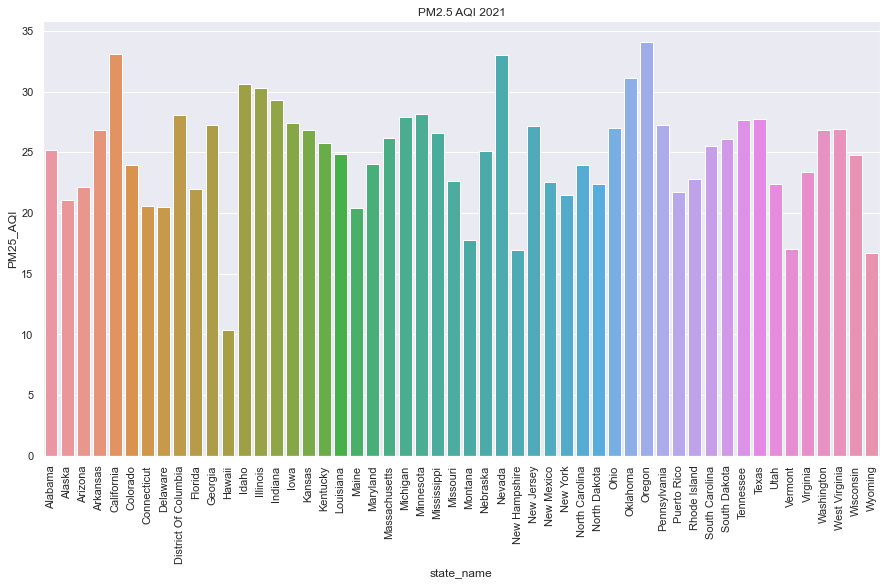

In [67]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='state_name',y='PM25_AQI',data=df_aqi_pm25)
plt.xticks(rotation=90)
plt.title('PM2.5 AQI 2021')
plt.show()

Semua negara bagian tersebut memiliki nilai AQI **PM2.5** yang tergolong *GOOD*. **Hawai** memiliki nilai AQI yang terkecil, sedangkan **Oregon** dan **California** dua negara bagian terbesar pada nilai AQI **PM2.5** tahun 2021.

##### PM10 AQI

Kita akan membuat DataFrame tersendiri untuk polutan **PM10** pada tiap negara bagian.

In [68]:
state_pm10_list = []
aqi_pm10_list = []
status_pm10_list = []
for i,j in (data_pollutant_2021.index):
    if j == 'PM10 Total 0-10um STP':
        pm10 = data_pollutant_2021.loc[i,j]['mean']
        if pm10 <= 54:
            aqi_pm10 = ((50-0)/(54-0))*(pm10-0) + 0
            state_pm10_list.append(i)
            aqi_pm10_list.append(aqi_pm10)
            status_pm10_list.append('Good')
        elif pm10 <= 125:
            aqi_pm10 = ((100-51)/(125-55))*(pm10-36) + 51
            state_pm10_list.append(i)
            aqi_pm10_list.append(aqi_pm10)
            status_pm10_list.append('Moderate')
        elif pm10 <= 254:
            aqi_pm10 = ((150-101)/(254-126))*(pm10-9.5) + 101
            state_pm10_list.append(i)
            aqi_pm10_list.append(aqi_pm10)
            status_pm10_list.append('Unhealthy for sensitive groups')
        elif pm10 <= 354:
            aqi_pm10 = ((200-151)/(354-255))*(pm10-12.5) + 151
            state_pm10_list.append(i)
            aqi_pm10_list.append(aqi_pm10)
            status_pm10_list.append('Unhealthy')
        elif pm10 <= 424:
            aqi_pm10 = ((300-201)/(424-355))*(pm10-0.106) + 201
            state_pm10_list.append(i)
            aqi_pm10_list.append(aqi_pm10)
            status_pm10_list.append('Very unhealthy')
        elif pm10 <= 504:
            aqi_pm10 = ((400-301)/(504-425))*(pm10-0.106) + 301
            state_pm10_list.append(i)
            aqi_pm10_list.append(aqi_pm10)
            status_pm10_list.append('Hazardous I')
        else:
            aqi_pm10 = ((500-401)/(604-505))*(pm10-0.106) + 401
            state_pm10_list.append(i)
            aqi_pm10_list.append(aqi_pm10)
            status_pm10_list.append('Hazardous II')

df_aqi_pm10 = pd.DataFrame({'state_name':state_pm10_list, 'PM10_AQI':aqi_pm10_list, 'status':status_pm10_list})
df_aqi_pm10.sort_values('PM10_AQI')

,state_name,PM10_AQI,status
37,Virginia,8.817944,Good
9,Hawaii,9.311379,Good
17,Maryland,10.223368,Good
32,Rhode Island,10.246914,Good
1,Alaska,10.793675,Good
6,Connecticut,11.338669,Good
39,Wisconsin,11.349407,Good
31,Pennsylvania,11.429872,Good
26,New York,11.764712,Good
16,Maine,12.194944,Good


Nilai AQI pada semua negara bagian tersebut dapat ditampilkan dengan diagram batang berikut.

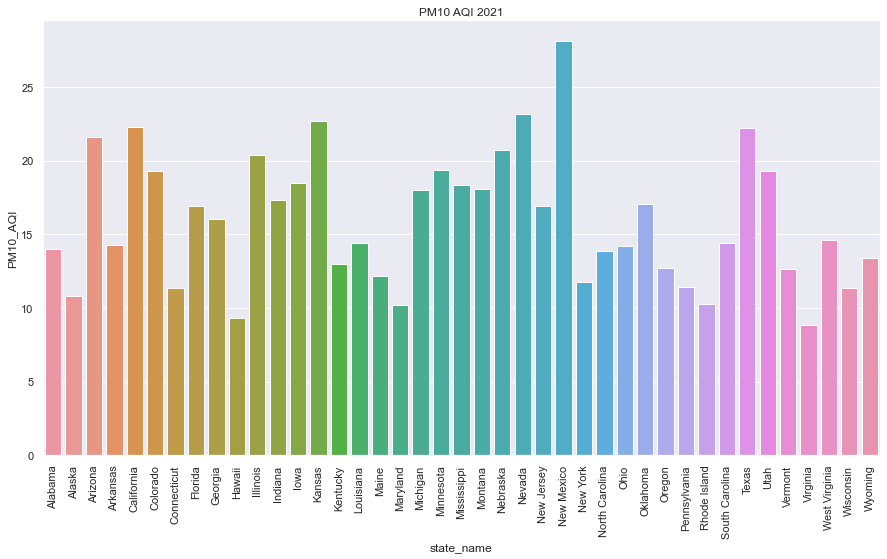

In [69]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='state_name',y='PM10_AQI',data=df_aqi_pm10)
plt.xticks(rotation=90)
plt.title('PM10 AQI 2021')
plt.show()

Semua negara bagian tersebut memiliki nilai AQI **PM10** yang tergolong *GOOD*. **Virginia** dan **Hawai** memiliki nilai AQI yang terkecil, sedangkan **New Mexico** memiliki nilai AQI **PM10** terbesar tahun 2021.

##### AQI 2021 

Untuk melihat nilai AQI keseluruhan polutan pada semua negara bagian , kita akan ringkas data sebelumnya dan menjadikannya ke dalam satu DataFrame.

In [70]:
#pd.concat([df_aqi_co, df_aqi_no2,df_aqi_o3,df_aqi_so2,df_aqi_pm10,df_aqi_pm25], join='inner', axis=1)
df_mergeaqi = pd.merge(df_aqi_co, df_aqi_no2, how='outer', on='state_name').merge(df_aqi_o3, how='outer',on='state_name').merge(df_aqi_so2,how='outer',on='state_name').merge(df_aqi_pm10,how='outer',on='state_name').merge(df_aqi_pm25, how='outer',on='state_name')
df_mergeaqi = df_mergeaqi[['state_name','CO_AQI','NO2_AQI','O3_AQI','SO2_AQI','PM10_AQI','PM25_AQI']]
df_mergeaqi

C:\Users\ikhbar\AppData\Local\Temp\ipykernel_8060\3779839993.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'status_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_mergeaqi = pd.merge(df_aqi_co, df_aqi_no2, how='outer', on='state_name').merge(df_aqi_o3, how='outer',on='state_name').merge(df_aqi_so2,how='outer',on='state_name').merge(df_aqi_pm10,how='outer',on='state_name').merge(df_aqi_pm25, how='outer',on='state_name')
C:\Users\ikhbar\AppData\Local\Temp\ipykernel_8060\3779839993.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'status_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_mergeaqi = pd.merge(df_aqi_co, df_aqi_no2, how='outer', on='state_name').merge(df_aqi_o3, how='outer',on='state_name').merge(df_aqi_so2,how='outer',on='state_name').merge(df_aqi_pm10,how='outer',on='state_name').merge(df_aqi_pm25, how='outer',on='state_name')


,state_name,CO_AQI,NO2_AQI,O3_AQI,SO2_AQI,PM10_AQI,PM25_AQI
0,Alabama,3.366554,14.004379,35.396902,1.335135,13.966716,25.165421
1,Alaska,3.671915,NaN,25.931134,7.079655,10.793675,21.069372
2,Arizona,3.282726,16.865585,45.948606,1.623775,21.571217,22.157865
3,California,3.428142,10.670686,39.062848,0.807874,22.308386,33.113853
4,Colorado,3.010972,9.262265,46.185517,1.328429,19.302363,23.981884
5,Connecticut,2.830559,14.934846,39.903776,0.324793,11.338669,20.607585
6,Delaware,2.895801,12.825452,40.627971,0.363607,NaN,20.497098
7,District Of Columbia,3.902940,15.884468,39.461265,NaN,NaN,28.038585
8,Florida,3.228448,11.336135,33.855907,1.507464,16.907541,22.009412
9,Georgia,5.324562,19.091175,36.875831,2.185835,16.037850,27.271258


Terdapat missing value dalam dataframe kita di atas, hal tersebut telah dibahas sebelumnya bahwa tidak semua negara bagian mempunyai site dalam pengukuran tiap polutan atau bisa saja terdapat faktor lain yang menyebabkan data tersebut tidak tercatat di tahun 2021 ini. Kita akan meninjau AQI berdasarkan 6 polutan, maka missing value di atas akan di remove dari dataframe.

In [71]:
df_mergeaqi.dropna(inplace=True) #Remove NaN dan replace
df_mergeaqi['Total_AQI'] = df_mergeaqi.mean(axis = 1) #Membuat kolom baru yang merupakan rata-rata dari AQI semua polutan
df_mergeaqi.sort_values('Total_AQI') #Mengurutkan berdasarkan total AQI

C:\Users\ikhbar\AppData\Local\Temp\ipykernel_8060\4034083739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mergeaqi.dropna(inplace=True) #Remove NaN dan replace
C:\Users\ikhbar\AppData\Local\Temp\ipykernel_8060\4034083739.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mergeaqi['Total_AQI'] = df_mergeaqi.mean(axis = 1) #Membuat kolom baru yang merupakan rata-rata dari AQI semua polutan
C:\Users\ikhbar\AppData\Local\Temp\ipykernel_8060\4034083739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,state_name,CO_AQI,NO2_AQI,O3_AQI,SO2_AQI,PM10_AQI,PM25_AQI,Total_AQI
10,Hawaii,3.350304,4.408944,24.354630,3.457210,9.311379,10.394590,9.212843
44,Vermont,2.178119,8.020508,34.728164,0.571564,12.669753,17.006144,12.529042
18,Maine,1.897051,6.876481,34.026943,0.225862,12.194944,20.428169,12.608242
49,Wyoming,1.210265,5.319562,45.968494,1.030618,13.353271,16.677721,13.926655
25,Montana,1.640290,1.671158,43.110330,1.358037,18.093775,17.746017,13.936601
45,Virginia,3.027390,10.340830,38.490862,1.475420,8.817944,23.408362,14.260135
17,Louisiana,3.037722,8.389545,33.861919,2.365171,14.430850,24.891249,14.496076
31,New York,2.556300,13.276328,37.109790,0.927192,11.764712,21.485617,14.519990
40,South Carolina,1.775915,7.774740,37.561087,0.316518,14.418414,25.518939,14.560935
48,Wisconsin,2.111006,9.125131,40.258377,1.155938,11.349407,24.774358,14.795703


Berdasrkan tabel di atas, dapat kita lihat **Total AQI** terbesar adalah **Nevada**, sedangkan **Total AQI** terkecil adalah **Hawaii**. Namun ada beberapa negara bagian yang telah kita *remove* yang juga patut diperhitungkan seperti **Puerto Rico** yang memiliki AQI masing-masing polutan yang cukup kecil, serta **Idaho** yang memiliki AQI masing-masing polutan yang cukup besar.

Namun apabila kita perhatikan nilai AQI ozone dan PM lebih tinggi dari nilai AQI polutan yang lain.
Besarnya AQI Ozone dapat dipicu oleh beberapa hal seperti polutan yang dikeluarkan oleh mobil, pembangkit listrik, boiler industri, kilang, pabrik kimia, dan sumber lainnya bereaksi secara kimia dengan adanya sinar matahari. Ozon kemungkinan besar mencapai tingkat yang tidak sehat pada hari-hari cerah yang panas di lingkungan perkotaan, tetapi masih dapat mencapai tingkat yang tinggi selama bulan-bulan yang lebih dingin

PM10 dan PM2. 5 sering berasal dari sumber emisi yang berbeda, dan juga memiliki komposisi kimia yang berbeda. Emisi dari pembakaran bensin, minyak, solar atau kayu menghasilkan sebagian besar polutan PM2.5 ditemukan di udara luar, serta sebagian besar PM10.

Walaupun secara keseluruhan AQI negara bagian US masuk dalam kategori *GOOD* namun pemerintah perlu waspada akan polutan PM dan Ozone.

Kita akan coba melihat distribusi **Total_AQI** tahun 2021 beserta central tendency(mean,median) dan skew.

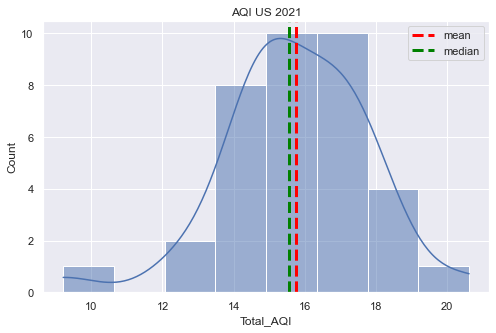

In [72]:
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(df_mergeaqi['Total_AQI'], kde=True)
plt.axvline(df_mergeaqi['Total_AQI'].mean(), linewidth = 3, linestyle='dashed',color = 'red', label='mean')
plt.axvline(df_mergeaqi['Total_AQI'].median(), linewidth = 3, linestyle='dashed',color = 'green',label='median')
plt.title('AQI US 2021')
plt.legend()

In [73]:
print(f'Skew: {df_mergeaqi["Total_AQI"].skew()}')
print(f'Mean: {df_mergeaqi["Total_AQI"].mean()}')
print(f'Median: {df_mergeaqi["Total_AQI"].median()}')
print(f'Standard deviation: {df_mergeaqi["Total_AQI"].std()}')

Skew: -0.5972515898401595
Mean: 15.739310822757497
Median: 15.568025745971
Standard deviation: 2.0373075993033476


Dapat kita lihat nilai mean dan median yang berdekatan serta skew yang mendekati 0, maka distribusi Total AQI US 2021 menyerupai distribusi normal dengan mean 15.74 dan standar devaiasi 2.04. Secara keseluruhan kualitas AQI di negara US dapat dikategorikan *GOOD* dengan penyebaran yang tidak besar (berdasarkan standar deviasi).

Apabila pemerintah ingin membuat suatu regulasi baru mengenai emisi industri dan kendaraan bermotor, regulasi tersebut dapat diterapkan terlebih dahulu pada negara bagian yang memiliki **Total AQI** yang besar seperti **Nevada**, **California**, dan **Arizona**. Apabila kita cermati ketiga negara bagian tersebut termasuk *Urban area*.

Berikutnya kita akan coba mengetahui adakah perbedaan kualitas udara *rural area* dengan *urban area* US di tahun 2021.

#### RURAL vs URBAN

Dalam mencari perbedaan pollutant tahun 2021 pada urban area dengan rural area, akan diambil data polutan dari sebagian negara bagian masing-masing.

Urban $X_1$: California, Texas, New Jersey, ,Nevada, dan Florida

Rural $X_2$: Mississippi, Vermont, Montana,Wyoming, Maine

Hipotesis dalam kasus disini adalah:
1. Tidak terdapat perbedaaan yang signifikan antara kadar polutan di urban area dan rural area 
2. Terdapat perbedaaan yang signifikan antara kadar polutan di urban area dan rural area 

Atau dapat ditulis sebagai berikut:

$\begin{equation}H_0:\mu_1=\mu_2\end{equation}$

$\begin{equation}H_1:\mu_1\neq\mu_2\end{equation}$

Dimana $\mu_1$ dapat diasosiasikan sebagai rata-rata konsentrasi semua polutan populasi data urban area tahun 2021, sedangkan $\mu_2$ merupakan rata-rata konsentrasi semua polutan populasi data rural area tahun 2021.

Uji hipotesis yang dilakukan adalah **Two Samples Independent Two Tailed Hypothesis testing** dengan significance level pada pengujian ini sebesar 0.05, dan kriteria pengambilan keputusan adalah:
- Accept $H_0$ apabila *p-value* $>0.05$
- Reject $H_0$ apabila *p-value* $<0.05$

Beberapa asumsi data pada uji hipotesis ini antara lain:
1. Kedua populasi berdistribusi normal dengan mean dan variance sama.
2. Kedua distribusi saling bebas atau independent.

Sebelum dilakukan uji hipotesis, kita akan membuat dua data untuk urban area dan rural area.

In [74]:
filter_urban2021 = ((data_pollutant['state_name'] == 'California') |(data_pollutant['state_name'] == 'Texas') |(data_pollutant['state_name'] == 'New Jersey') |(data_pollutant['state_name'] == 'Florida')|(data_pollutant['state_name'] == 'Nevada')) & (data_pollutant['year'] == 2021)
data_urban2021 = data_pollutant[filter_urban2021][['state_name','parameter_name','mean']]
data_urban2021

,state_name,parameter_name,mean
38199,California,Carbon monoxide,0.413540
38200,California,Nitrogen dioxide (NO2),14.086463
38201,California,Ozone,0.033002
38202,California,Sulfur dioxide,0.132227
38204,California,Ozone,0.041876
...,...,...,...
41050,Texas,Carbon monoxide,0.172700
41052,Texas,Ozone,0.039276
41053,Texas,PM10 Total 0-10um STP,26.445449
41054,Texas,PM2.5 - Local Conditions,10.211866


In [75]:
filter_rural2021 = ((data_pollutant['state_name'] == 'Mississippi') |(data_pollutant['state_name'] == 'Vermont') |(data_pollutant['state_name'] == 'Montana') |(data_pollutant['state_name'] == 'Maine')|(data_pollutant['state_name'] == 'Wyoming')) & (data_pollutant['year'] == 2021)
data_rural2021 = data_pollutant[filter_rural2021][['state_name','parameter_name','mean']]
data_rural2021

,state_name,parameter_name,mean
39388,Maine,Carbon monoxide,0.156541
39389,Maine,Nitrogen dioxide (NO2),3.281734
39390,Maine,Ozone,0.032697
39391,Maine,PM10 Total 0-10um STP,13.565217
39392,Maine,PM2.5 - Local Conditions,5.350000
...,...,...,...
41531,Wyoming,PM10 Total 0-10um STP,5.777778
41532,Wyoming,PM2.5 - Local Conditions,4.132617
41538,Wyoming,PM10 Total 0-10um STP,11.923016
41542,Wyoming,Ozone,0.048596


Kita coba cek terlebih dahulu kedua rata-rata data urban dan rural, apakah terlihat sangat berbeda?

In [76]:
mean_rural2021 = data_rural2021['mean'].mean()
mean_urban2021 = data_urban2021['mean'].mean()
print(f'Average rural state {mean_rural2021}, average urban state {mean_urban2021}')

Average rural state 4.371126584980932, average urban state 6.076797322890227


Mean data urban terlihat lebih besar dari mean data rural tahun 2021. Untuk lebih memastikan ada atau tidaknya perbedaan  dari kedua data polutan tersebut kita akan lakukan uji hipotesis dengan mencari nilai *P-value*.

In [77]:
t_stat, p_val = stats.ttest_ind(data_rural2021['mean'],data_urban2021['mean'])
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 0.038306820065547434
t-statistics: -2.076681379969996


Karena nilai *P-value* 0.038 yang mana lebih kecil dari 0.05,maka kesimpulan reject $H_0$. Sehingga dapat dinyatakan terdapat pengaruh yang cukup signifikan antara pollutant di area rural state dengan area urban. Apabila melihat dari mean kedua data tersebut, kita juga dapat menyimpulkan bahwa terjadi kadar polutan di daerah urban lebih besar dari daerah rural. Kita juga dapat membuktikan hal tersebut dengan melakukan uji one tail, niscaya didapatkan kesimpulan yang sama. 

Kesimpulan: **Terdapat perbedaan signifikan antara pollutant di area rural state dengan area urban Amerika Serikat pada tahun 2021.**

### Kesimpulan

Berdasarkan data yang didapat, dapat dilihat kadar tiap polutan mengalami penurunan dalam tiap tahunnya, terutama pada **PM10** yang mengalami penurunan drastis dari tahun 2018 ke tahun 2019 dan **CO** dari tahun 2013 ke tahun 2014, yang sebelumnya mengalami kenaikan yang cukup drastis. Apabila kita perhatikan setelah tahun 2019, trends tiap polutan cenderung mulai agak naik, meskipun kenaikan tidak drastis namun hal tersebut mulai harus kita waspadai.

Kita juga melihat bahwa weather infromation seperti tekanan udara, suhu dan sebagainya saling berhubungan dengan memiliki korelasi positif dan negatif terhadap jenis polutannya. Sebagai contoh pada tahun 2012 ke 2013, Outdoor Temperature meningkat, Wind Direction mengalami penurunan, dan Carbon monoxide mengalami peningkatan. Pada tahun 2013 ke 2014 terjadi sebaliknya Outdoor Temperature turun, Wind Direction mengalami kenaikan, dan Carbon monoxide mengalami penurunan. Nilai korelasi tiap parameter tersebut dapat membantu kita meninjau perilaku polutan dan info cuaca.

Kualitas udara untuk tiap negara bagian dapat dilihat berdasarkan hasil perhitungan AQI, dimana **Total AQI** terbesar adalah **Nevada**, sedangkan **Total AQI** terkecil adalah **Hawaii**. Namun ada beberapa negara bagian yang juga patut diperhitungkan seperti **Puerto Rico** yang memiliki AQI masing-masing polutan yang cukup kecil, serta **Idaho** yang memiliki AQI masing-masing polutan yang cukup besar. Distribusi Total AQI US 2021 memiliki nilai mean dan median yang berdekatan serta skew yang mendekati 0, maka distribusi Total AQI US 2021 menyerupai distribusi normal dengan mean 15.74 dan standar devaiasi 2.04. Secara keseluruhan kualitas AQI di negara US dapat dikategorikan *GOOD* dengan penyebaran yang tidak besar (berdasarkan standar deviasi).

Namun apabila kita perhatikan nilai AQI ozone dan PM lebih tinggi dari nilai AQI polutan yang lain.
Besarnya AQI Ozone dapat dipicu oleh beberapa hal seperti polutan yang dikeluarkan oleh mobil, pembangkit listrik, boiler industri, kilang, pabrik kimia, dan sumber lainnya bereaksi secara kimia dengan adanya sinar matahari. Ozon kemungkinan besar mencapai tingkat yang tidak sehat pada hari-hari cerah yang panas di lingkungan perkotaan, tetapi masih dapat mencapai tingkat yang tinggi selama bulan-bulan yang lebih dingin

PM10 dan PM2.5 sering berasal dari sumber emisi yang berbeda, dan juga memiliki komposisi kimia yang berbeda. Emisi dari pembakaran bensin, minyak, solar atau kayu menghasilkan sebagian besar polutan PM2.5 ditemukan di udara luar, serta sebagian besar PM10. Walaupun secara keseluruhan AQI negara bagian US masuk dalam kategori *GOOD* namun pemerintah perlu waspada akan polutan PM dan Ozone.

Apabila pemerintah ingin membuat suatu regulasi baru mengenai emisi industri dan kendaraan bermotor, regulasi tersebut dapat diterapkan terlebih dahulu pada negara bagian yang memiliki **Total AQI** yang besar seperti **Nevada**, **California**, dan **Arizona**. Apabila kita cermati ketiga negara bagian tersebut termasuk *Urban area*. Berdasarkan hasil analisis statistik inferensia didapat kesimpulan bahwa kadar polutan di daerah urban dan rural memiliki perbedaan yang cukup signifikan.